In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Colab Notebooks/eminem_lyrics_generator

/content/drive/My Drive/Colab Notebooks/eminem_lyrics_generator


In [0]:
import pandas as pd
import numpy as np
import re
import os

In [0]:
# reading lyrics from files

lines = []
for filename in os.listdir("data/"):
    file = open("data/" + filename)
    lines.append(file.read())

In [0]:
lines = pd.DataFrame(lines, columns=['lines'])

In [0]:
def clean_text(sentence):
    sentence = sentence.lower()

    sentence = re.sub(r"i'm", "i am", sentence)
    sentence = re.sub(r"i’m", "i am", sentence)

    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"he’s", "he is", sentence)

    sentence = re.sub(r"she's", "she is", sentence)
    sentence = re.sub(r"she’s", "she is", sentence)

    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"it’s", "it is", sentence)

    sentence = re.sub(r"that's", "that is", sentence)
    sentence = re.sub(r"that’s", "that is", sentence)

    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"what’s", "what is", sentence)

    sentence = re.sub(r"where's", "where is", sentence)
    sentence = re.sub(r"where’s", "where is", sentence)

    sentence = re.sub(r"there's", "there is", sentence)
    sentence = re.sub(r"there’s", "there is", sentence)

    sentence = re.sub(r"who's", "who is", sentence)
    sentence = re.sub(r"who’s", "who is", sentence)

    sentence = re.sub(r"how's", "how is", sentence)
    sentence = re.sub(r"how’s", "how is", sentence)

    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"’ll", " will", sentence)

    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"’ve", " have", sentence)

    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"’re", " are", sentence)

    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"’d", " would", sentence)

    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"won’t", "will not", sentence)

    sentence = re.sub(r"can't", "cannot", sentence)
    sentence = re.sub(r"can’t", "cannot", sentence)

    sentence = re.sub(r"n't", " not", sentence)
    sentence = re.sub(r"n’t", " not", sentence)

    sentence = re.sub(r"n'", "ng", sentence)
    sentence = re.sub(r"n’", "ng", sentence)

    sentence = re.sub(r"'bout", "about", sentence)
    sentence = re.sub(r"’bout", "about", sentence)

    sentence = re.sub(r"'til", "until", sentence)
    sentence = re.sub(r"’til", "until", sentence)

    sentence = re.sub(r"c'mon", "come on", sentence)
    sentence = re.sub(r"c’mon", "come on", sentence)
    
    sentence = re.sub("\n", "", sentence)

    sentence = re.sub("[-*/()\"’'#/@;:<>{}`+=~|.!?,]", "", sentence)
    
    return sentence

In [0]:
lines.lines = lines.lines.apply(lambda line: clean_text(line))

In [8]:
lines.head()

,lines
0,step by step heart to heart left right leftwe ...
1,we touch i feel a rushwe clutchit is not much ...
2,this is survival of the fittestthis is do or d...
3,just gonna stand there and watch me burnwell t...
4,may i have your attention pleasemay i have you...


In [9]:
lines.shape

(15, 1)

In [0]:
lines.lines = lines.lines.apply(lambda line: line.split())

In [0]:
x_train = [line[:-1] for line in lines.lines]
y_train = [line[1:] for line in lines.lines]

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer()

In [0]:
tokenizer.fit_on_texts(lines.lines)

In [0]:
x_train = tokenizer.texts_to_sequences(x_train)
y_train = tokenizer.texts_to_sequences(y_train)

In [0]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}

In [0]:
word2idx["<pad>"] = 0
idx2word[0] = "<pad>"

In [18]:
lengths = []

for sequence in x_train:
    lengths.append(len(sequence))
    
lengths = pd.Series(lengths)
lengths.describe()

count      15.000000
mean      832.266667
std       196.566770
min       669.000000
25%       711.500000
50%       791.000000
75%       863.000000
max      1462.000000
dtype: float64

In [19]:
maxlen = 1024
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
vocab_size

2935

In [0]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
y_train = pad_sequences(y_train, maxlen=maxlen, padding='post', truncating='post')

In [0]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, Dense, Input, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [0]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True))
model.add(GRU(units=1024, return_sequences=True))
model.add(Dense(vocab_size))

In [0]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True))

In [37]:
history = model.fit(x_train, y_train, epochs=50, verbose=1) #400

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0843
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0827
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0810
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0795
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0779
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0764
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 9/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0721
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 11/50
1/1 [==============================] - 0s 1ms/step - loss: 0.0693
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 0.

In [0]:
model.save("model.h5")
#model = load_model("model.h5")

In [0]:
def generate(word):
    word = clean_text(word)
    inputs = np.zeros((1, 1))
    inputs[0, 0] = word2idx[word]
    count = 1
    while count <= 100:
        pred = model.predict(inputs)
        word = np.argmax(pred)
        if word >= vocab_size:
            word = vocab_size - 1

        inputs[0, 0] = word
        
        print(idx2word[word], end=" ")
        count += 1


In [46]:
generate("slim")

shady is alright because i am frozen would know sometimes things have tried ideas gonna stand upi am frozen would know sometimes things have tried ideas gonna stand upi am frozen would know sometimes things have tried ideas gonna stand upi am frozen would know sometimes things have tried ideas gonna stand upi am frozen would know sometimes things have tried ideas gonna stand upi am frozen would know sometimes things have tried ideas gonna stand upi am frozen would know sometimes things have tried ideas gonna stand upi am frozen would know sometimes things have tried ideas gonna stand 

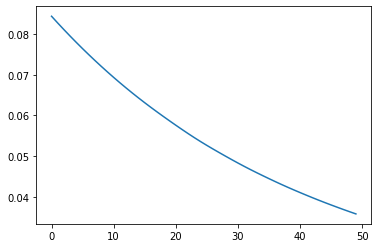

In [47]:
import matplotlib.pyplot as plt

plt.plot(range(50), history.history['loss'])